In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [19]:
with open("first_database.pkl", "rb")as f:
    X,y=pickle.load(f)

In [20]:
# plt.scatter(x,y, s=0.01)

In [21]:
# parameters
n = 100
m = 10
a = 5
sigma = 0.5
nu = 1.0

In [22]:
sel = list(range(n))
ind = np.random.choice(sel,m,replace=False)
x_selected = X[ind] # ids_M
ind

array([15, 75, 10, 27,  2, 83, 74, 89, 69, 78])

In [23]:
def kernel(x1, x2):
    return np.exp(-(x1-x2)**2)
    # return np.exp(-sum((x1-x2)**2))

def kernel_matrix(ids1, ids2):
    return np.array([[kernel(X[i], X[j]) for j in ids2] for i in ids1])

Kmm = kernel_matrix(ind, ind)
Knm = kernel_matrix(sel, ind)

In [24]:
def estimate_alpha(alpha, y):
    return sigma**2 / 2 * alpha.T@Kmm@alpha + 1/2 * np.sum((y - Knm@alpha)**2)  + nu/2*np.sum(alpha**2)

def calc_f(val, alpha):
    return sum(alpha[i]*kernel(val, X[ind[i]]) for i in range(len(alpha)))

def grad_fi(alpha, ids_agent):
    Kim = Knm[ids_agent, :]
    return sigma**2*Kmm@alpha + np.sum(Kim.T@(Kim@alpha - y[ids_agent])) + nu*alpha 

def optimality_gap():
    raise NotImplementedError("TODO: implement")

In [25]:
import random
import networkx as nx

#nx.path_graph
# nx.cycle_graph
# nx.complete_graph
# nx.erdos_renyi_graph
# nx.laplacian_matrix

def laplacian_weight_matrix(G, epsilon):
    assert epsilon < min(1/val for (node, val) in G.degree() if val!=0)
    return np.identity(G.number_of_nodes) - epsilon*nx.laplacian_matrix(G)

def metropolis_weight_matrix(G, lazy=False):
    a = G.number_of_nodes()
    W = np.zeros((a,a))
    degrees = [val for (node, val) in G.degree()]
    for i in range(a):
        for j in range(i+1, a):
            weight = 1 / (1 + max(degrees[i], degrees[j]))
            if lazy:
                weight /= 2
            W[i,j] = W[j,i] = weight

    W[np.diag_indices_from(W)] = 1 - np.sum(W, axis = 1)
    return W

In [26]:
sel_copy = np.arange(n)
np.random.shuffle(sel_copy)
agents = np.array_split(sel_copy, 5)

In [ ]:
step_size = 0.01 # placeholder
step_count = 10 # placeholder

W = metropolis_weight_matrix(nx.cycle_graph(a))




In [ ]:
x

array([[[ 6.14782212e-03,  8.73427813e-03,  8.69661534e-03,
         -1.27011818e-02, -8.73711765e-03, -4.93626310e-03,
          3.36137874e-03, -5.99588985e-03, -4.96772000e-03,
         -1.07852938e-02],
        [-3.39290288e-03, -2.41962106e-03,  1.15160006e-02,
          1.47712566e-03,  1.05533847e-02, -9.31482697e-03,
          3.11558781e-03,  8.54217192e-06,  2.20780161e-02,
         -1.38600008e-03],
        [ 9.89241766e-04,  6.53170171e-03,  2.16057206e-03,
          1.64120764e-02,  5.45303984e-03,  3.97940326e-04,
         -7.37750526e-03, -3.22959441e-03, -1.43508409e-02,
          9.65527490e-03],
        [ 4.31398132e-03,  1.48689153e-03,  1.75990873e-03,
          7.30370142e-05,  1.85503764e-03,  5.04199984e-03,
          1.37367171e-02, -6.49298123e-03,  4.81552713e-03,
         -6.80086134e-03],
        [-9.73178656e-03, -1.30711301e-02,  8.42751631e-03,
          6.47927196e-04, -1.37494723e-02, -9.42539537e-03,
          3.23387982e-03,  8.99098325e-03, -1.212257

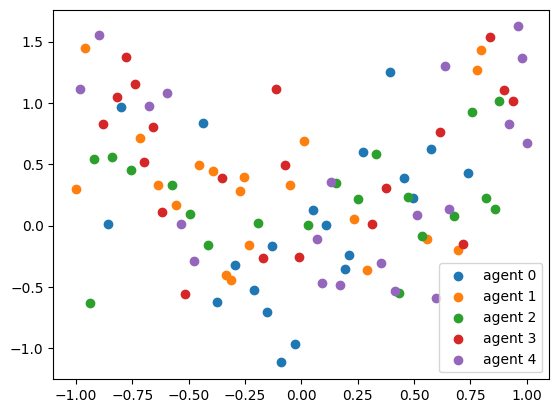

In [ ]:
# plt.scatter(x[sel], y[sel])
for i in range(a):
    plt.scatter(X[agents[i]], y[agents[i]], label="agent %d"%(i))


nt = 250
x_linspace = np.linspace(-1, 1, nt)
for s in range(0, step_count+1, step_count // 5):
    pred = [calc_f(v, xi[s, 0, :]) for v in x_linspace]
    plt.plot(x_linspace, pred, label="step %d" % s)

plt.legend()
plt.show()